## Imports

In [1]:
import sys
sys.path.append("..")

import os
import numpy as np
import matplotlib.pyplot as plt

from src.preprocessing import AudioPreprocessor
from src.train import ModelTrainer
from src.config import RESULTS_PATH

c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Loading data

In [2]:
preprocessor = AudioPreprocessor()
processed_data = preprocessor.load_processed_data("ravdess_processed.pkl")

print(f"\nDataset Info:")
print(f"Training samples: {len(processed_data['X_train'])}")
print(f"Test samples: {len(processed_data['X_test'])}")
print(f"Feature dimension: {processed_data['feature_dim']}")
print(f"Number of classes: {len(processed_data['label_encoder'].classes_)}")
print(f"Classes: {list(processed_data['label_encoder'].classes_)}")

Loaded processed data from: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\data\processed\ravdess_processed.pkl
Training samples: 2304
Test samples: 576
Feature dimension: 382

Dataset Info:
Training samples: 2304
Test samples: 576
Feature dimension: 382
Number of classes: 8
Classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fear'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]


## Training Models

In [3]:
trainer = ModelTrainer(processed_data)

In [4]:
# Train baseline MLP model
print("TRAINING BASELINE MLP MODEL...")
history_mlp = trainer.train(
    model_type="mlp",
    hidden_layers=[256, 128, 64],
    dropout_rate=0.3,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)
print("\nTraining complete")

TRAINING BASELINE MLP MODEL...

Building MLP model...

MODEL: MLP


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │        98,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,512 (552.78 KB)

 Trainable params: 140,616 (549.28 KB)

 Non-trainable params: 896 (3.50 KB)

Total parameters: 141,512
Trainable parameters: 140,616


Training MLP model...
Training samples: 2304
Validation split: 0.2
Batch size: 32
Max epochs: 100
Epoch 1/100
51/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1822 - loss: 3.1318
Epoch 1: val_accuracy improved from None to 0.43167, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 1: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2501 - loss: 2.8312 - val_accuracy: 0.4317 - val_loss: 2.2176 - learning_rate: 0.0010
Epoch 2/100
52/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3557 - loss: 2.4172
Epoch 2: val_accuracy improved from 0.43167 to 0.51844, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 2: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3842 - loss: 2.3078 - val_accuracy: 0.5184 - val_loss: 1.9096 - learning_rate: 0.0010
Epoch 3/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4636 - loss: 2.0864
Epoch 3: val_accuracy improved from 0.51844 to 0.57701, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 3: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4802 - loss: 2.0358 - val_accuracy: 0.5770 - val_loss: 1.7468 - learning_rate: 0.0010
Epoch 4/100
54/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5204 - loss: 1.9213
Epoch 4: val_accuracy improved from 0.57701 to 0.61605, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 4: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5431 - loss: 1.8623 - val_accuracy: 0.6161 - val_loss: 1.5864 - learning_rate: 0.0010
Epoch 5/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5981 - loss: 1.7136
Epoch 5: val_accuracy improved from 0.61605 to 0.70933, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 5: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6017 - loss: 1.6759 - val_accuracy: 0.7093 - val_loss: 1.4217 - learning_rate: 0.0010
Epoch 6/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6578 - loss: 1.5643
Epoch 6: val_accuracy improved from 0.70933 to 0.75705, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 6: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6484 - loss: 1.5627 - val_accuracy: 0.7570 - val_loss: 1.3354 - learning_rate: 0.0010
Epoch 7/100
54/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6649 - loss: 1.4839
Epoch 7: val_accuracy did not improve from 0.75705
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6614 - loss: 1.5012 - val_accuracy: 0.7072 - val_loss: 1.3245 - learning_rate: 0.0010
Epoch 8/100
49/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7070 - loss: 1.4151
Epoch 8: val_accuracy improved from 0.75705 to 0.77223, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 8: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7097 - loss: 1.3912 - val_accuracy: 0.7722 - val_loss: 1.2195 - learning_rate: 0.0010
Epoch 9/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7157 - loss: 1.3189
Epoch 9: val_accuracy improved from 0.77223 to 0.79826, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 9: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7260 - loss: 1.3107 - val_accuracy: 0.7983 - val_loss: 1.1295 - learning_rate: 0.0010
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7724 - loss: 1.2032
Epoch 10: val_accuracy improved from 0.79826 to 0.80477, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 10: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7547 - loss: 1.2426 - val_accuracy: 0.8048 - val_loss: 1.1357 - learning_rate: 0.0010
Epoch 11/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7798 - loss: 1.1942
Epoch 11: val_accuracy improved from 0.80477 to 0.82213, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 11: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7765 - loss: 1.1868 - val_accuracy: 0.8221 - val_loss: 1.0401 - learning_rate: 0.0010
Epoch 12/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8035 - loss: 1.1145
Epoch 12: val_accuracy improved from 0.82213 to 0.82429, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 12: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8095 - loss: 1.1047 - val_accuracy: 0.8243 - val_loss: 1.0525 - learning_rate: 0.0010
Epoch 13/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7992 - loss: 1.0899
Epoch 13: val_accuracy improved from 0.82429 to 0.84165, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 13: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8106 - loss: 1.0911 - val_accuracy: 0.8416 - val_loss: 0.9843 - learning_rate: 0.0010
Epoch 14/100
53/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8495 - loss: 1.0130
Epoch 14: val_accuracy improved from 0.84165 to 0.84599, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 14: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8275 - loss: 1.0318 - val_accuracy: 0.8460 - val_loss: 0.9621 - learning_rate: 0.0010
Epoch 15/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 1.0252
Epoch 15: val_accuracy improved from 0.84599 to 0.86117, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 15: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8171 - loss: 1.0338 - val_accuracy: 0.8612 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 16/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8350 - loss: 1.0160
Epoch 16: val_accuracy improved from 0.86117 to 0.86551, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 16: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8313 - loss: 1.0072 - val_accuracy: 0.8655 - val_loss: 0.8992 - learning_rate: 0.0010
Epoch 17/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8524 - loss: 0.9337
Epoch 17: val_accuracy did not improve from 0.86551
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8502 - loss: 0.9571 - val_accuracy: 0.8547 - val_loss: 0.9131 - learning_rate: 0.0010
Epoch 18/100
54/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8585 - loss: 0.9596
Epoch 18: val_accuracy improved from 0.86551 to 0.86985, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 18: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8573 - loss: 0.9599 - val_accuracy: 0.8698 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 19/100
49/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8679 - loss: 0.8808
Epoch 19: val_accuracy improved from 0.86985 to 0.87852, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 19: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8622 - loss: 0.9030 - val_accuracy: 0.8785 - val_loss: 0.8532 - learning_rate: 0.0010
Epoch 20/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8897 - loss: 0.8349
Epoch 20: val_accuracy did not improve from 0.87852
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8801 - loss: 0.8607 - val_accuracy: 0.8698 - val_loss: 0.8970 - learning_rate: 0.0010
Epoch 21/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8785 - loss: 0.8405
Epoch 21: val_accuracy did not improve from 0.87852
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8714 - loss: 0.8558 - val_accuracy: 0.8764 - val_loss: 0.8623 - learning_rate: 0.0010
Epoch 22/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.9238
Epoch 22: val_accuracy improved from 0.87852 to 0.88069, savi


Epoch 22: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8568 - loss: 0.8872 - val_accuracy: 0.8807 - val_loss: 0.8265 - learning_rate: 0.0010
Epoch 23/100
51/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8838 - loss: 0.8210
Epoch 23: val_accuracy improved from 0.88069 to 0.88937, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 23: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8839 - loss: 0.8239 - val_accuracy: 0.8894 - val_loss: 0.8175 - learning_rate: 0.0010
Epoch 24/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8986 - loss: 0.8028
Epoch 24: val_accuracy improved from 0.88937 to 0.90022, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 24: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8817 - loss: 0.8350 - val_accuracy: 0.9002 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 25/100
51/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8885 - loss: 0.8072
Epoch 25: val_accuracy did not improve from 0.90022
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8806 - loss: 0.8249 - val_accuracy: 0.8807 - val_loss: 0.8247 - learning_rate: 0.0010
Epoch 26/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9063 - loss: 0.7698
Epoch 26: val_accuracy did not improve from 0.90022
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9018 - loss: 0.7860 - val_accuracy: 0.8937 - val_loss: 0.7860 - learning_rate: 0.0010
Epoch 27/100
52/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9013 - loss: 0.7744
Epoch 27: val_accuracy did not improve from 0.90022
58/58 ━━━


Epoch 31: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8953 - loss: 0.7519 - val_accuracy: 0.9132 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 32/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9226 - loss: 0.6881
Epoch 32: val_accuracy did not improve from 0.91323
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9278 - loss: 0.6818 - val_accuracy: 0.8850 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 33/100
53/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9071 - loss: 0.7074
Epoch 33: val_accuracy improved from 0.91323 to 0.91540, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5



Epoch 33: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9061 - loss: 0.7183 - val_accuracy: 0.9154 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 34/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9042 - loss: 0.7379
Epoch 34: val_accuracy did not improve from 0.91540
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9034 - loss: 0.7360 - val_accuracy: 0.8980 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 35/100
54/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.6606
Epoch 35: val_accuracy did not improve from 0.91540
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9230 - loss: 0.6660 - val_accuracy: 0.9089 - val_loss: 0.7339 - learning_rate: 0.0010
Epoch 36/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8961 - loss: 0.7111
Epoch 36: val_accuracy did not improve from 0.91540
58/58 ━━━


Epoch 39: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9246 - loss: 0.6489 - val_accuracy: 0.9436 - val_loss: 0.6459 - learning_rate: 5.0000e-04
Epoch 40/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9488 - loss: 0.5761
Epoch 40: val_accuracy did not improve from 0.94360
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9533 - loss: 0.5730 - val_accuracy: 0.9284 - val_loss: 0.6492 - learning_rate: 5.0000e-04
Epoch 41/100
48/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9586 - loss: 0.5623
Epoch 41: val_accuracy did not improve from 0.94360
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9588 - loss: 0.5537 - val_accuracy: 0.9241 - val_loss: 0.6433 - learning_rate: 5.0000e-04
Epoch 42/100
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.5434
Epoch 42: val_accuracy did not improve from 0.943


Epoch 69: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\mlp_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9832 - loss: 0.3878 - val_accuracy: 0.9458 - val_loss: 0.5275 - learning_rate: 1.2500e-04
Epoch 70/100
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.3742
Epoch 70: val_accuracy did not improve from 0.94577
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.3836 - val_accuracy: 0.9349 - val_loss: 0.5255 - learning_rate: 1.2500e-04
Epoch 71/100
46/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9833 - loss: 0.3709
Epoch 71: val_accuracy did not improve from 0.94577
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9832 - loss: 0.3733 - val_accuracy: 0.9371 - val_loss: 0.5384 - learning_rate: 1.2500e-04
Epoch 72/100
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.3749
Epoch 72: val_accuracy did not improve from 0.945

Training history plot saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\mlp_training_history.png


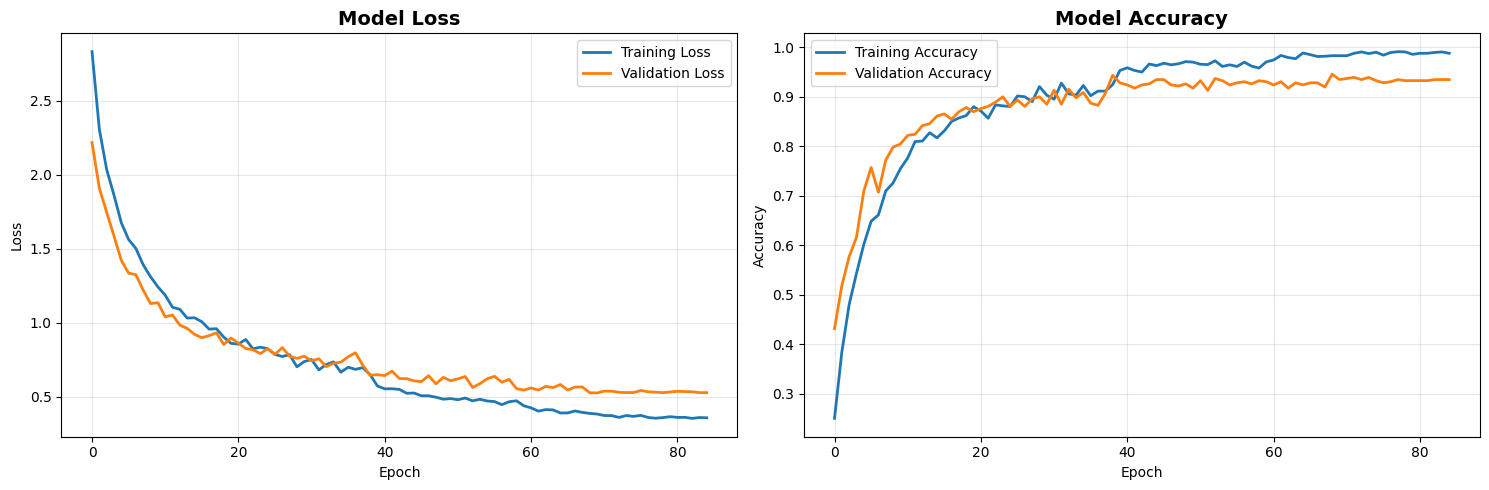

In [5]:
# Plot training data
trainer.plot_training_history(save_path=os.path.join(RESULTS_PATH, "plots", "mlp_training_history.png"))

## Evaluation

Confusion matrix saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\mlp_confusion_matrix.png


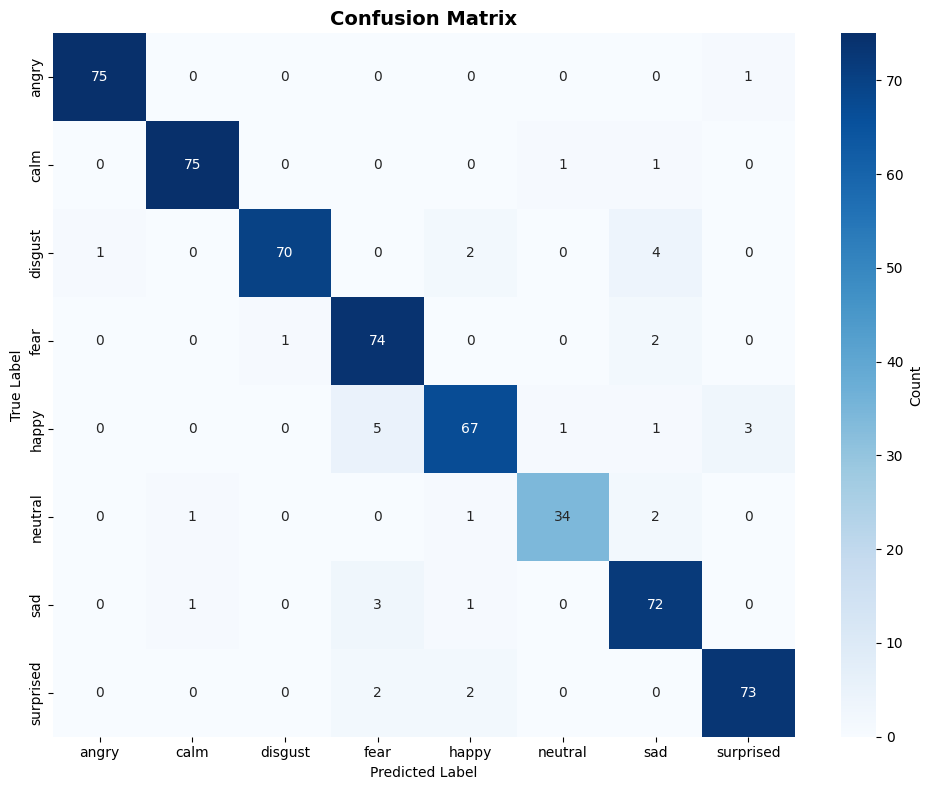


Normalized Confusion Matrix:
           angry   calm  disgust   fear  happy  neutral    sad  surprised
angry      0.987  0.000    0.000  0.000  0.000    0.000  0.000      0.013
calm       0.000  0.974    0.000  0.000  0.000    0.013  0.013      0.000
disgust    0.013  0.000    0.909  0.000  0.026    0.000  0.052      0.000
fear       0.000  0.000    0.013  0.961  0.000    0.000  0.026      0.000
happy      0.000  0.000    0.000  0.065  0.870    0.013  0.013      0.039
neutral    0.000  0.026    0.000  0.000  0.026    0.895  0.053      0.000
sad        0.000  0.013    0.000  0.039  0.013    0.000  0.935      0.000
surprised  0.000  0.000    0.000  0.026  0.026    0.000  0.000      0.948


In [8]:
# Evaluate on test set
y_pred_mlp, y_true = trainer.evaluate(model_type="mlp")
trainer.plot_confusion_matrix(y_pred_mlp, y_true, save_path=os.path.join(RESULTS_PATH, "plots", "mlp_confusion_matrix.png"))

In [12]:
# Print classification report
trainer.print_classification_report(y_pred_mlp, y_true)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.9868    0.9868    0.9868        76
        calm     0.9740    0.9740    0.9740        77
     disgust     0.9859    0.9091    0.9459        77
        fear     0.8810    0.9610    0.9193        77
       happy     0.9178    0.8701    0.8933        77
     neutral     0.9444    0.8947    0.9189        38
         sad     0.8780    0.9351    0.9057        77
   surprised     0.9481    0.9481    0.9481        77

    accuracy                         0.9375       576
   macro avg     0.9395    0.9349    0.9365       576
weighted avg     0.9391    0.9375    0.9376       576



In [11]:
# Save results
trainer.save_results("mlp", y_pred_mlp, y_true)


Results saved:
  - History: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\mlp_history.pkl
  - Predictions: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\mlp_predictions.csv


In [13]:
from sklearn.metrics import accuracy_score

# Overall accuracy
accuracy = accuracy_score(y_true, y_pred_mlp)
print(f"Overall Accuracy: {accuracy:.4f}")

# Per class accuracy
for emotion_idx in range(len(processed_data["label_encoder"].classes_)):
    emotion_name = processed_data["label_encoder"].classes_[emotion_idx]
    mask = (y_true == emotion_idx)
    if mask.sum() > 0:
        class_accuracy = accuracy_score(y_true[mask], y_pred_mlp[mask])
        print(f"{emotion_name.capitalize()}: {class_accuracy:.4f} ({mask.sum()} samples)")

# Most confused pairs
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_mlp)
np.fill_diagonal(cm, 0) # remove correct predictions

confused_pairs = []
class_names = processed_data["label_encoder"].classes_

for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            confused_pairs.append((class_names[i], class_names[j], cm[i, j]))

confused_pairs.sort(key=lambda x : x[2], reverse=True)

print("\nMost Confused Emotion Pairs:")
top_k = 5
for true_emotion, pred_emotion, count in confused_pairs[:top_k]:
    print(f"{true_emotion} -> {pred_emotion}: {count} times")

Overall Accuracy: 0.9375
Angry: 0.9868 (76 samples)
Calm: 0.9740 (77 samples)
Disgust: 0.9091 (77 samples)
Fear: 0.9610 (77 samples)
Happy: 0.8701 (77 samples)
Neutral: 0.8947 (38 samples)
Sad: 0.9351 (77 samples)
Surprised: 0.9481 (77 samples)

Most Confused Emotion Pairs:
happy -> fear: 5 times
disgust -> sad: 4 times
happy -> surprised: 3 times
sad -> fear: 3 times
disgust -> happy: 2 times
